 All datasets cleaned and reshaped successfully.
 Final Merged TIMES Shape: (4441, 22)

 Columns:
 ['world_rank', 'university_name', 'country_x', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio', 'year', 'school_name', 'country_y', 'country', 'institute_type', 'direct_expenditure_type', 'education_expenditure_gdp', 'tertiary_education_percent', 'has_edu_data']

 Missing Values:
country                   2299
female_male_ratio          329
international_students     112
num_students                90
student_staff_ratio         90
dtype: int64

 Sample Data:


<ipython-input-80-279454139>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_times['institute_type'].fillna('Unknown', inplace=True)
<ipython-input-80-279454139>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,world_rank,university_name,country_x,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,school_name,country_y,country,institute_type,direct_expenditure_type,education_expenditure_gdp,tertiary_education_percent,has_edu_data
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011,Harvard University,United States of America,NaN,Unknown,Unknown,0.0,0.0,False
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,California Institute of Technology,United States of America,NaN,Unknown,Unknown,0.0,0.0,False
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011,Massachusetts Institute of Technology,United States of America,NaN,Unknown,Unknown,0.0,0.0,False
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011,Stanford University,United States of America,NaN,Unknown,Unknown,0.0,0.0,False
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011,Princeton University,United States of America,NaN,Unknown,Unknown,0.0,0.0,False



 Data Types:
 world_rank                     object
university_name                object
country_x                      object
teaching                      float64
international                  object
research                      float64
citations                     float64
income                         object
total_score                    object
num_students                   object
student_staff_ratio           float64
international_students         object
female_male_ratio              object
year                            int64
school_name                    object
country_y                      object
country                        object
institute_type                 object
direct_expenditure_type        object
education_expenditure_gdp     float64
tertiary_education_percent    float64
has_edu_data                     bool
dtype: object


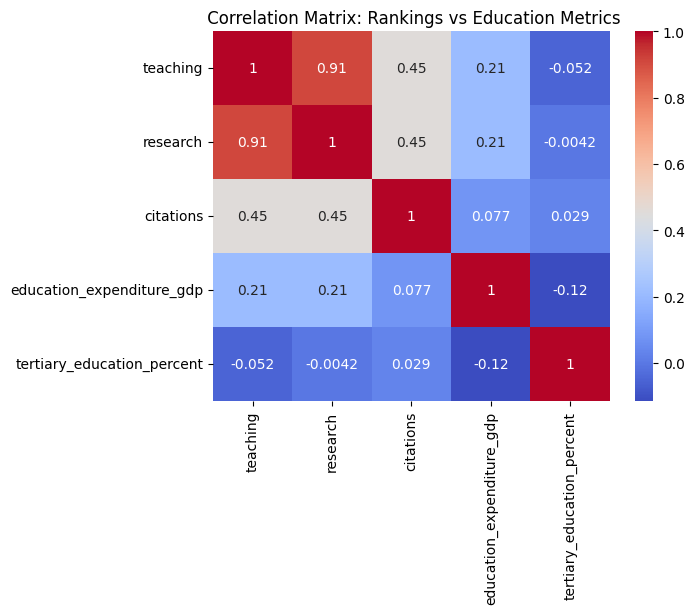

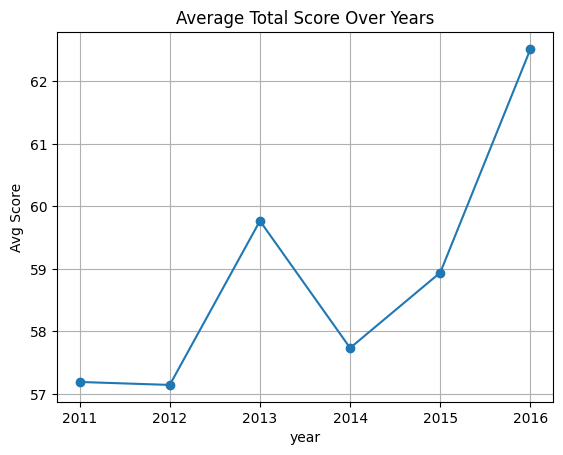


 Unique Universities: 818
Unique Countries (from School Mapping): 70

 Valid rows with full education data: 56
 Sample country-year pairs with full data:
       country_y  year
542       Norway  2011
636  New Zealand  2011


In [80]:
# Import required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set the base path for all CSV files
base_path = "/content/sample_data/UniversityRankingData/"

# Function to safely read CSV files, handling potential errors
def safe_read_csv(filepath):
    try:
        return pd.read_csv(filepath, engine='python', on_bad_lines='skip')
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return pd.DataFrame()

# Load datasets
times = safe_read_csv(os.path.join(base_path, "timesData.csv"))
cwur = safe_read_csv(os.path.join(base_path, "cwurData.csv"))
shanghai = safe_read_csv(os.path.join(base_path, "shanghaiData.csv"))
school_country = safe_read_csv(os.path.join(base_path, "school_and_country_table.csv"))
edu_spending = safe_read_csv(os.path.join(base_path, "education_expenditure_supplementary_data.csv"))
edu_attainment = safe_read_csv(os.path.join(base_path, "educational_attainment_supplementary_data.csv"))

# Standardize column names: lowercase, underscore instead of space, trimmed
for df in [times, cwur, shanghai, school_country, edu_spending, edu_attainment]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- Reshape education expenditure data ---
edu_spending_long = pd.melt(
    edu_spending,
    id_vars=["country", "institute_type", "direct_expenditure_type"],
    var_name="year",
    value_name="education_expenditure_gdp"
)
edu_spending_long['year'] = pd.to_numeric(edu_spending_long['year'], errors='coerce')
edu_spending_long['education_expenditure_gdp'] = pd.to_numeric(edu_spending_long['education_expenditure_gdp'], errors='coerce')
edu_spending_long.dropna(subset=['year', 'education_expenditure_gdp'], inplace=True)

# --- Filter and reshape tertiary education attainment data ---
edu_attainment_filtered = edu_attainment[edu_attainment["series_name"].str.contains("tertiary", case=False, na=False)]
edu_attainment_long = pd.melt(
    edu_attainment_filtered,
    id_vars=["country_name"],
    var_name="year",
    value_name="tertiary_education_percent"
)
edu_attainment_long['year'] = pd.to_numeric(edu_attainment_long['year'], errors='coerce')
edu_attainment_long['tertiary_education_percent'] = pd.to_numeric(edu_attainment_long['tertiary_education_percent'], errors='coerce')
edu_attainment_long.dropna(subset=['year', 'tertiary_education_percent'], inplace=True)
edu_attainment_long.rename(columns={'country_name': 'country'}, inplace=True)

print(" All datasets cleaned and reshaped successfully.")

# --- Merge ranking datasets with school-country mapping ---
merged_times = times.merge(school_country, how='left', left_on='university_name', right_on='school_name')
merged_cwur = cwur.merge(school_country, how='left', left_on='institution', right_on='school_name')
merged_shanghai = shanghai.merge(school_country, how='left', left_on='university_name', right_on='school_name')

# --- Combine the reshaped education datasets ---
merged_edu = pd.merge(edu_spending_long, edu_attainment_long, how='outer', on=['country', 'year'])

# --- Merge TIMES dataset with education data based on country and year ---
final_merged_times = pd.merge(
    merged_times,
    merged_edu,
    how='left',
    left_on=['country_y', 'year'],
    right_on=['country', 'year']
)

# --- Handle missing values for key columns ---
final_merged_times['institute_type'].fillna('Unknown', inplace=True)
final_merged_times['direct_expenditure_type'].fillna('Unknown', inplace=True)
final_merged_times['education_expenditure_gdp'].fillna(0, inplace=True)
final_merged_times['tertiary_education_percent'].fillna(0, inplace=True)

# --- Add flag for rows with complete education data ---
final_merged_times['has_edu_data'] = (
    final_merged_times['education_expenditure_gdp'] > 0
) & (
    final_merged_times['tertiary_education_percent'] > 0
)

# --- Basic information and structure ---
print(" Final Merged TIMES Shape:", final_merged_times.shape)
print("\n Columns:\n", final_merged_times.columns.tolist())

# --- Check and print missing values ---
print("\n Missing Values:")
missing = final_merged_times.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# --- Preview of final merged dataset ---
print("\n Sample Data:")
display(final_merged_times.head())

# --- Data types of each column ---
print("\n Data Types:\n", final_merged_times.dtypes)

# --- Correlation heatmap for key numeric metrics ---
corr_cols = ['teaching', 'research', 'citations', 'education_expenditure_gdp', 'tertiary_education_percent']
corr_df = final_merged_times[corr_cols].dropna()
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Matrix: Rankings vs Education Metrics")
plt.show()

# --- Plot average total score per year ---
if 'total_score' in final_merged_times.columns:
    try:
        final_merged_times['total_score'] = pd.to_numeric(final_merged_times['total_score'], errors='coerce')
    except:
        pass
    score_by_year = final_merged_times.groupby('year')['total_score'].mean()
    score_by_year.plot(marker='o', title='Average Total Score Over Years')
    plt.ylabel('Avg Score')
    plt.grid(True)
    plt.show()
else:
    print(" 'total_score' column not found for plotting.")

# --- Unique counts of universities and countries ---
print("\n Unique Universities:", final_merged_times['university_name'].nunique())
print("Unique Countries (from School Mapping):", final_merged_times['country_y'].nunique())

# --- Display rows with complete education data ---
edu_rows = final_merged_times[final_merged_times['has_edu_data']]
print(f"\n Valid rows with full education data: {edu_rows.shape[0]}")
print(" Sample country-year pairs with full data:")
print(edu_rows[['country_y', 'year']].drop_duplicates().head())
